In [1]:
import numpy as np
import pandas as pd
import os

/Users/hadoop1/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

In [3]:
import didi

In [4]:
dataLoader = didi.dataLoader()

In [5]:
hashToNumber, numberToHash = dataLoader.load_clusterMap(path='season_1/training_data/cluster_map/cluster_map')

In [6]:
explorer = didi.explorer(numberToHash=numberToHash)

In [7]:
transformer = didi.transformer(hashToNumber=hashToNumber, numberToHash=numberToHash)

In [8]:
testGapDf = transformer.get_gap('2016-01-20', folder='training')

In [9]:
%matplotlib inline

In [10]:
predictior = didi.predictor()

## prediction by average
predict 1/22 according to average gaps from 1/15, 1/8

In [11]:
predictAverageDict = {}

In [12]:
gapDf0115 = transformer.get_gap('2016-01-15', folder='training')
gapDf0108 = transformer.get_gap('2016-01-08', folder='training')
predict0122 = predictior.predict_by_average(gapDf0115, gapDf0108)
predictAverageDict['2016-01-22'] = predict0122

In [13]:
gapDf0110 = transformer.get_gap('2016-01-10', folder='training')
gapDf0117 = transformer.get_gap('2016-01-17', folder='training')
predict0124 = predictior.predict_by_average(gapDf0110, gapDf0117)
predictAverageDict['2016-01-24'] = predict0124

In [14]:
gapDf0105 = transformer.get_gap('2016-01-05', folder='training')
gapDf0106 = transformer.get_gap('2016-01-06', folder='training')
gapDf0107 = transformer.get_gap('2016-01-07', folder='training')
gapDf0112 = transformer.get_gap('2016-01-12', folder='training')
gapDf0113 = transformer.get_gap('2016-01-13', folder='training')
gapDf0114 = transformer.get_gap('2016-01-14', folder='training')
gapDf0119 = transformer.get_gap('2016-01-19', folder='training')
gapDf0120 = transformer.get_gap('2016-01-20', folder='training')
gapDf0121 = transformer.get_gap('2016-01-21', folder='training')
predict0126 = predictior.predict_by_average(gapDf0105, gapDf0106, gapDf0107, gapDf0112, gapDf0113, gapDf0114,\
                                            gapDf0119, gapDf0120, gapDf0121)
predictAverageDict['2016-01-26'] = predict0126
predict0128 = predictior.predict_by_average(gapDf0105, gapDf0106, gapDf0107, gapDf0112, gapDf0113, gapDf0114,\
                                            gapDf0119, gapDf0120, gapDf0121)
predictAverageDict['2016-01-28'] = predict0128

In [15]:
gapDf0109 = transformer.get_gap('2016-01-09', folder='training')
gapDf0116 = transformer.get_gap('2016-01-16', folder='training')
predict0130 = predictior.predict_by_average(gapDf0109, gapDf0116)
predictAverageDict['2016-01-30'] = predict0130

In [16]:
gapDict = {'2016-01-22': predict0122, '2016-01-24': predict0124, '2016-01-26': predict0126, '2016-01-28': predict0128,\
           '2016-01-30': predict0130}
printCsv('0531', gapDict)

NameError: name 'printCsv' is not defined

In [ ]:
predictE

In [306]:
def transformTraffic(trafficDf):
    
    date = trafficDf.index[0].strftime("%Y-%m-%d")
    
    hashToNum, numToHash = dataLoader.load_clusterMap(path='season_1/training_data/cluster_map/cluster_map')
    
    timeSlotList = ['{}-{}'.format(date, x) for x in trafficDf['time_period']]
    trafficList1 = trafficDf['block1'].tolist()
    trafficList2 = trafficDf['block2'].tolist()
    trafficList3 = trafficDf['block3'].tolist()
    trafficList4 = trafficDf['block4'].tolist()
    hashNumList = trafficDf['districtHash'].map(lambda x: hashToNum[x]).tolist()
    
    df = pd.DataFrame({'districtNum': hashNumList, 'traffic1': trafficList1, 'traffic2': trafficList2,\
                       'traffic3': trafficList3, 'traffic4': trafficList4}, index=timeSlotList)
    return df

In [4]:
import pandas as pd

/Users/hadoop1/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [33]:
def transform_trafficData(date, **option):
    '''
    '''
    
    hashToNumber, numberToHash = load_clusterMap('season_1/training_data/cluster_map/cluster_map')
    
    if option['folder'] == 'testing':
        dirpath = 'season_1/test_set_1/traffic_data/traffic_data_' + date + '_test'
    elif option['folder'] == 'training':
        dirpath = 'season_1/training_data/traffic_data/traffic_data_' + date
    
    columnNames = ['districtHash', 'traffic_level1', 'traffic_level2', 'traffic_level3', 'traffic_level4', 'Time']
    trafficDf = pd.read_csv(dirpath, sep='\t', header=None, names=columnNames,\
                       index_col='Time', parse_dates=True)
    for col in columnNames:
        if col.startswith('traffic_level'):
            trafficDf[col] = trafficDf[col].map(lambda x: int(x.split(':')[1]))
            
    timeIndex = (trafficDf.index.hour * 60 + trafficDf.index.minute) / 10
    
    timeIndex += 1
    
    trafficDf['time_slot'] = timeIndex
    
    trafficDf['district_id'] = trafficDf['districtHash'].apply(lambda x: hashToNumber[x]) 
    
    trafficDf.index = trafficDf['time_slot']
    trafficDf.rename(index=lambda x: '{}-{}'.format(date, x), inplace=True)
    
    trafficFinalDf = trafficDf[['district_id', 'traffic_level1', 'traffic_level2', 'traffic_level3', 'traffic_level4']]
    
    #return trafficSlotDf
    return trafficFinalDf

In [34]:
trafficDf = transform_trafficData('2016-01-20', folder='training')

In [38]:
%matplotlib inline

In [47]:
trafficDf[trafficDf['district_id'] == '4'].sort_index()

,district_id,traffic_level1,traffic_level2,traffic_level3,traffic_level4
time_slot,,,,,
2016-01-20-10,4,490,55,15,24
2016-01-20-100,4,694,208,110,56
2016-01-20-101,4,664,189,115,65
2016-01-20-102,4,672,196,91,59
2016-01-20-103,4,738,246,103,51
2016-01-20-104,4,703,249,120,44
2016-01-20-105,4,638,213,123,41
2016-01-20-106,4,709,215,132,46
2016-01-20-107,4,707,215,116,46


In [ ]:
trafficDf[trafficDf['district_id'] == '1'].plot

In [ ]:
trafficDf[trafficDf['district_id'] == '1'].plot

In [22]:
trafficDf = transform_trafficData('2016-01-20', folder='training')

In [384]:
def get_y(gapDf, date):
    
    # reformat the index for gapSlotDf 
    indexSlot = ['{}-{}'.format(date, x[1]) for x in gapDf.index.get_values()]
    yDf = gapDf.reset_index()[['district_id', 'gap']]
    yDf.index = indexSlot
    
    return yDf 

In [401]:
trafficSlotDf = transform_trafficData('2016-01-15', folder='training')

In [381]:
y = get_y(test, date='2016-01-02')

In [20]:
def transformWeatherDf(weatherDf):
    
    date = weatherDf.index[0].strftime("%Y-%m-%d")
    weatherDropDf = weatherDf.drop_duplicates('time_period')
    timeSlotList = ['{}-{}'.format(date, x) for x in weatherDropDf['time_period']]
    df = pd.DataFrame({'weather': weatherDropDf['Weather'].tolist(),\
                       'temperature': weatherDropDf['temperature'].tolist(),\
                       'PM25': weatherDropDf['PM25'].tolist()}, index=timeSlotList)
    
    return df

In [46]:
test = transform_weatherData('2016-01-02', folder='training')

In [47]:
test.head()

,Weather,temperature,PM25,time_period
time_slot,,,,
2016-01-02-1,2,8.0,131,1
2016-01-02-2,2,8.0,131,2
2016-01-02-3,2,8.0,131,3
2016-01-02-4,2,8.0,131,4
2016-01-02-5,2,8.0,140,5


In [26]:
test.index = test['PM25']

In [27]:
test

,PM25,temperature,weather
PM25,,,
131,131,8.0,2
131,131,8.0,2
131,131,8.0,2
131,131,8.0,2
140,140,8.0,2
140,140,8.0,2
140,140,8.0,2
140,140,8.0,2
140,140,8.0,2


In [455]:
df2.index

Index([u'2016-01-01-1', u'2016-01-01-2', u'2016-01-01-3', u'2016-01-01-4',
       u'2016-01-01-5', u'2016-01-01-6', u'2016-01-01-7', u'2016-01-01-8',
       u'2016-01-01-9', u'2016-01-01-10',
       ...
       u'2016-01-01-135', u'2016-01-01-136', u'2016-01-01-137',
       u'2016-01-01-138', u'2016-01-01-139', u'2016-01-01-140',
       u'2016-01-01-141', u'2016-01-01-142', u'2016-01-01-143',
       u'2016-01-01-144'],
      dtype='object', length=142)

In [465]:
trafficMIDf = df1.set_index('districtNum', append=True)

In [468]:
gapMIDf = df3.set_index('district_id', append=True)

In [474]:
gapMIDf

,,gap
,district_id,
2016-01-01-1,50,0
2016-01-01-2,50,0
2016-01-01-3,50,0
2016-01-01-4,50,0
2016-01-01-5,50,0
2016-01-01-6,50,2
2016-01-01-7,50,1
2016-01-01-8,50,0
2016-01-01-9,50,0


In [470]:
df2

,PM25,temperature,weather
2016-01-01-1,177,4.0,1
2016-01-01-2,177,3.0,1
2016-01-01-3,177,3.0,1
2016-01-01-4,177,3.0,1
2016-01-01-5,177,3.0,1
2016-01-01-6,177,3.0,1
2016-01-01-7,177,3.0,1
2016-01-01-8,177,3.0,1
2016-01-01-9,177,3.0,1
2016-01-01-10,177,3.0,1


In [312]:
weatherSlotDf= transform_weatherData('2016-01-05', folder='training')

In [389]:
weatherSlotDf

,PM25,temperature,weather
2016-01-05-1,170,12.0,4
2016-01-05-2,170,12.0,8
2016-01-05-3,170,12.0,4
2016-01-05-4,170,12.0,4
2016-01-05-5,165,12.0,4
2016-01-05-6,165,12.0,8
2016-01-05-7,165,12.0,8
2016-01-05-8,165,12.0,8
2016-01-05-9,165,12.0,8
2016-01-05-10,165,11.0,8


In [414]:
def create_matrix():
    dayList = ["%.2d" % i for i in range(1, 22)]
    dayList = ['01']
    for i in dayList:
        date = '2016-01-' + i
        trafficSlotDf = transform_trafficData(date, folder='training')
        # print trafficDf.index[0]        
        weatherSlotDf= transform_weatherData(date, folder='training')
        
        ySlotDf = get_y(transformer.get_gap(date, folder='training'), date)
        
        return trafficSlotDf, weatherSlotDf, ySlotDf

In [415]:
df1, df2, df3 = create_matrix()

In [441]:
df4 = df1.set_index('districtNum', append=True)

In [448]:
df5 = df3.join(df2)

In [451]:
df5.set_index('district_id', append=True)

gap   PM25  temperature  weather
              district_id                                  
2016-01-01-1  50             0  177.0          4.0      1.0
              43             0  177.0          4.0      1.0
              63             0  177.0          4.0      1.0
              46             1  177.0          4.0      1.0
              56             0  177.0          4.0      1.0
              6              0  177.0          4.0      1.0
              66             0  177.0          4.0      1.0
              31             0  177.0          4.0      1.0
              18             0  177.0          4.0      1.0
              28             0  177.0          4.0      1.0
              14             6  177.0          4.0      1.0
              16             0  177.0          4.0      1.0
              21             1  177.0          4.0      1.0
              24             2  177.0          4.0      1.0
              25             1  177.0          4.0      1.0
              47             0  177.0          4.0      1.0
              55             0  177.0          4.0      1.0
              35             0  177.0          4.0      1.0
              23             5  177.0          4.0      1.0
              60             0  177.0          4.0      1.0
              13             0  177.0          4.0      1.0
              5              0  177.0          4.0      1.0
              10             0  177.0          4.0      1.0
              38             0  177.0          4.0      1.0
              29             0  177.0          4.0      1.0
              33             0  177.0          4.0      1.0
              26             0  177.0          4.0      1.0
              3              1  177.0          4.0      1.0
              48             5  177.0          4.0      1.0
              39             2  177.0          4.0      1.0
...                        ...    ...          ...      ...
2016-01-01-99 8             14  168.0         12.0      2.0
              44             0  168.0         12.0      2.0
              22            19  168.0         12.0      2.0
              34             1  168.0         12.0      2.0
              1             10  168.0         12.0      2.0
              20             4  168.0         12.0      2.0
              7            282  168.0         12.0      2.0
              19             1  168.0         12.0      2.0
              62             2  168.0         12.0      2.0
              17             0  168.0         12.0      2.0
              37            11  168.0         12.0      2.0
              4              3  168.0         12.0      2.0
              9              5  168.0         12.0      2.0
              57             2  168.0         12.0      2.0
              64             0  168.0         12.0      2.0
              54             0  168.0         12.0      2.0
              45             0  168.0         12.0      2.0
              42             2  168.0         12.0      2.0
              58             0  168.0         12.0      2.0
              36             1  168.0         12.0      2.0
              51           614  168.0         12.0      2.0
              59             0  168.0         12.0      2.0
              15             5  168.0         12.0      2.0
              11             2  168.0         12.0      2.0
              61             0  168.0         12.0      2.0
              2              1  168.0         12.0      2.0
              53             0  168.0         12.0      2.0
              41             2  168.0         12.0      2.0
              27            10  168.0         12.0      2.0
              32             0  168.0         12.0      2.0

[9504 rows x 4 columns]

In [449]:
df4

,,traffic1,traffic2,traffic3,traffic4
,districtNum,,,,
2016-01-01-142,66,231,33,13,10
2016-01-01-56,66,305,69,13,16
2016-01-01-132,64,579,87,28,16
2016-01-01-39,64,242,28,10,9
2016-01-01-6,64,471,35,15,17
2016-01-01-84,64,401,98,64,28
2016-01-01-105,2,593,242,42,22
2016-01-01-20,2,570,41,21,28
2016-01-01-57,2,706,129,23,17


In [ ]:
df5.set_index

In [386]:
testDf = transform_trafficData('2016-01-01', folder='training')

In [387]:
testDf

,districtNum,traffic1,traffic2,traffic3,traffic4
2016-01-01-142,66,231,33,13,10
2016-01-01-56,66,305,69,13,16
2016-01-01-132,64,579,87,28,16
2016-01-01-39,64,242,28,10,9
2016-01-01-6,64,471,35,15,17
2016-01-01-84,64,401,98,64,28
2016-01-01-105,2,593,242,42,22
2016-01-01-20,2,570,41,21,28
2016-01-01-57,2,706,129,23,17
2016-01-01-25,15,11,0,0,0


In [289]:
create_matrix()

2016-01-01-142


AttributeError: 'str' object has no attribute 'strftime'

In [245]:
hashToNum, numToHash = dataLoader.load_clusterMap(path='season_1/training_data/cluster_map/cluster_map')
hashNumList = trafficDf['districtHash'].map(lambda x: hashToNum[x]).tolist()

In [105]:
def transform_PoiData(**option):
    '''
    '''
    if option['folder'] == 'testing':
        filedir = 'season_1/test_set_1/poi_data/poi_data'
    elif option['folder'] == 'training':
        filedir = 'season_1/training_data/poi_data/poi_data'
        
    columnNames = ['district_hash', 'poi_class']
    poiDf = pd.read_csv(filedir, sep='\t', header=None, names=columnNames)
    
    return poiDf

In [106]:
transform_PoiData(folder='testing')

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,district_hash,poi_class
74c1c25f4b283fa74a5514307b0d0278,1#11:2241,1#10:249,24:1245,25:3652,20:33449,22:2324,23:913,4:13031,8:166,5#4:83,5#3:3569,5#2:83,5#1:4731,8#2:8798,8#3:5229,8#1:664,8#4:7387,8#5:83,1#3:498,1#2:2822,1#1:415,1#7:166,1#6:83,1#5:12367,1#4:249,1#9:166,1#8:4316,14#10:664,7:6640,15#7:1411,15#6:5644,15#4:249,15#3:11537,15#2:4150,4#8:747,4#9:2988,4#6:913,4#7:1743,4#4:166,4#5:4814,4#2:1328,4#3:1743,4#1:664,16#1:83,16#2:332,16#3:332,16#4:7968,17#1:249,16#9:332,17#3:498,17#2:12201,17#5:20999,17#4:3569,11#8:36188,13#8:1660,11#3:6640,11#2:7221,11#1:1992,11#7:2490,11#6:18924,11#5:2822,11#4:30544,19#3:27722,19#2:1245,19#1:1826,19#4:581,14#6:1909,14#7:1909,14#2:83,14#3:1245,6:8466,14#8:83,14#9:83,4#10:4067,4#11:3569,4#12:83,4#13:7387,4#14:2656,4#16:664,4#17:4150,4#18:4648,3#1:3652,3#3:166,3#2:166,11:10956,15:6059,14:4399,17:2988,16:7636,19:55859,6#1:1826,6#2:664,6#4:830,2#12:4648,2#13:249,2#10:2490,2#11:1826,20#7:11952,20#6:830,20#5:5561,20#4:11703,20#2:6557,20#1:8217,16#12:3818,16#10:15521,16#11:9711,20#8:118690,23#1:498,23#2:83,23#3:498,23#4:249,23#5:996,23#6:249,22#1:498,22#3:83,22#2:2324,22#5:913,22#4:1328,25#8:1909,25#9:6142,25#3:581,25#6:415,25#7:4980,25#5:249,1:4482,5:249,24#3:166,24#2:5727,24#1:133713,13#4:19173,2#8:166,2#4:249,2#5:1079,2#6:1245,2#7:1826,2#1:83,2#2:9213,2#3:415
08f5b445ec6b29deba62e6fd8b0325a6,20#7:249,20#5:83,2#7:166,20#2:747,20#1:996,16#12:1245,16#10:2158,16#11:415,20#8:249,15#4:83,23#5:83,5#3:83,1:83,22#5:83,1#4:166,19#3:2075,25:415,19#1:415,25#9:83,20:83,19#4:332,3#1:2739,21#1:83,25#6:83,25#7:249,14#6:913,14#7:5312,4:664,7:2324,6:83,24#1:249,14#8:83,14#3:249,15#7:415,15#6:249,5#4:83,15#3:415,15#2:249,5#1:83,19#2:498,4#7:1162,4#16:166,4#14:83,4#2:249,4#1:83,8#2:249,16#2:166,16#4:1079,8#4:166,4#17:664,4#18:83,1#7:83,17#2:83,17#5:166,1#6:249,11:332,1#2:83,1#1:332,24:83,15:332,14:4731,16:415,19:8051,11#7:332,2#6:83,1#8:332,14#10:415,1#11:83,11#8:2324,21#2:415,13#8:83,2#5:83,13#4:913,11#1:498,14#9:249,2#12:249,2#13:166,2#10:332,11#4:166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4b7f6f4e2bf237b6cc58f57142bea5c0,4#16:249,24:913,25:332,20:4316,22:415,4:2158,5#4:83,5#3:166,5#1:332,8#2:996,8#4:830,1#2:83,1#1:166,1#5:913,1#4:83,1#8:664,14#10:166,3:83,7:2573,15#7:249,15#6:664,15#4:166,15#3:2656,15#2:1411,4#8:249,4#4:83,4#5:166,4#2:498,4#3:249,4#1:332,16#3:166,16#4:2822,16#8:166,16#9:166,17#2:1079,17#5:1245,11#8:4565,13#8:166,11#3:83,11#2:166,11#1:83,11#7:166,11#6:1328,11#5:83,11#4:1162,19#3:3901,19#2:498,19#1:2241,19#4:415,14#6:332,6:249,4#10:83,4#11:166,4#12:83,4#13:83,4#14:415,1#11:166,4#17:747,4#18:664,3#1:4565,3#3:83,11:996,15:747,17:166,16:996,19:15521,6#1:83,2#12:498,2#10:913,2#11:83,20#7:2241,20#6:166,20#5:664,20#4:1162,20#2:166,20#1:4316,16#12:1743,16#10:664,16#11:1909,20#8:5478,23#1:83,23#5:83,22#3:498,22#2:332,22#5:83,22#4:581,25#8:415,25#9:1162,25#3:83,25#1:83,25#7:830,25#5:166,24#1:6972,13#4:2241,2#9:83,2#4:83,2#5:249,2#6:332,2#7:498,2#2:415,21#1:83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a814069db8d32f0fa6e188f41059c6e1,1#11:498,24:332,25:581,20:5810,22:2407,4:1494,8:83,5#1:581,8#2:996,8#3:166,8#1:166,8#4:747,1#2:166,1#6:83,1#5:664,1#4:83,1#8:83,14#10:83,7:1494,15#7:498,15#6:415,15#4:83,15#3:1909,15#2:332,4#8:249,4#6:249,4#7:83,4#5:166,4#2:996,16#3:249,16#4:1826,17#2:1328,17#5:332,11#8:5395,11#3:83,13#4:1494,11#7:332,11#6:1079,11#4:2905,19#3:3320,19#2:249,19#1:2075,19#4:332,14#6:332,14#3:83,6:996,4#10:249,4#11:83,4#14:664,4#16:249,4#17:83,4#18:581,3#1:2739,3#3:83,11:996,15:1328,17:166,16:1328,19:27639,6#1:249,6#3:83,2#12:332,2#13:83,2#10:415,20#7:7055,20#5:581,

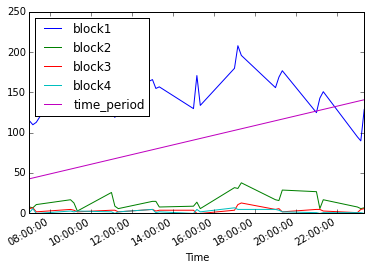

In [262]:
df[1].plot()

In [240]:
trafficDf

,districtHash,block1,block2,block3,block4,time_period
Time,,,,,,
2016-01-22 09:10:47,1ecbb52d73c522f184a6fc53128b1ea1,239,127,28,21,56
2016-01-22 17:20:47,f2c8c4bb99e6377d21de71275afd6cd2,627,299,55,22,105
2016-01-22 09:20:45,f2c8c4bb99e6377d21de71275afd6cd2,660,143,18,19,57
2016-01-22 13:00:40,4b9e4cf2fbdc8281b8a1f9f12b80ce4d,90,28,5,0,79
2016-01-22 11:10:39,1cbfbdd079ef93e74405c53fcfff8567,301,53,19,19,68
2016-01-22 15:00:42,f9280c5dab6910ed44e518248048b9fe,303,39,23,0,91
2016-01-22 21:20:40,74ec84f1cf75cf89ae176c8c6ceec5ba,234,41,0,4,129
2016-01-22 13:10:39,74ec84f1cf75cf89ae176c8c6ceec5ba,224,29,9,3,80
2016-01-22 19:10:48,4f8d81b5c31af5d1ba579a65ddc8a5cb,405,113,43,28,116


In [199]:
columnNames = ['districtHash', 'block1', 'block2', 'block3', 'block4', 'Time']
trafficDf = pd.read_csv('season_1/test_set_1/traffic_data/traffic_data_2016-01-22_test', sep='\t', header=None, names=columnNames,\
                       index_col='Time', parse_dates=True)

In [224]:
test = trafficDf[trafficDf['districtHash'] == '1ecbb52d73c522f184a6fc53128b1ea1']['block1']

In [225]:
test

Time
2016-01-22 09:10:47    1:239
2016-01-22 09:20:46    1:264
2016-01-22 19:00:48    1:266
2016-01-22 19:10:48    1:334
2016-01-22 19:20:46    1:285
2016-01-22 13:00:40    1:256
2016-01-22 07:00:27    1:254
2016-01-22 07:10:29    1:263
2016-01-22 07:20:31    1:220
2016-01-22 15:00:42    1:292
2016-01-22 15:10:41    1:299
2016-01-22 15:20:41    1:263
2016-01-22 23:00:33    1:278
2016-01-22 17:00:46    1:349
2016-01-22 17:10:43    1:260
2016-01-22 17:20:48    1:277
2016-01-22 11:00:40    1:236
2016-01-22 11:10:40    1:295
2016-01-22 11:20:39    1:282
2016-01-22 13:10:40    1:274
2016-01-22 13:20:40    1:241
2016-01-22 21:00:41    1:236
2016-01-22 21:10:40    1:232
2016-01-22 21:20:40    1:278
2016-01-22 23:10:34    1:257
2016-01-22 23:20:32    1:193
2016-01-22 09:00:47    1:256
Name: block1, dtype: object

In [226]:
test.map(lambda x: x.split(':')[1])

Time
2016-01-22 09:10:47    239
2016-01-22 09:20:46    264
2016-01-22 19:00:48    266
2016-01-22 19:10:48    334
2016-01-22 19:20:46    285
2016-01-22 13:00:40    256
2016-01-22 07:00:27    254
2016-01-22 07:10:29    263
2016-01-22 07:20:31    220
2016-01-22 15:00:42    292
2016-01-22 15:10:41    299
2016-01-22 15:20:41    263
2016-01-22 23:00:33    278
2016-01-22 17:00:46    349
2016-01-22 17:10:43    260
2016-01-22 17:20:48    277
2016-01-22 11:00:40    236
2016-01-22 11:10:40    295
2016-01-22 11:20:39    282
2016-01-22 13:10:40    274
2016-01-22 13:20:40    241
2016-01-22 21:00:41    236
2016-01-22 21:10:40    232
2016-01-22 21:20:40    278
2016-01-22 23:10:34    257
2016-01-22 23:20:32    193
2016-01-22 09:00:47    256
Name: block1, dtype: object

In [196]:
!ls

Untitled.ipynb  Untitled1.ipynb citydata.tar.gz pandas_tutorial season_1


In [785]:
orderTest0122 = pd.read_csv('season_1/test_set_1/order_data/order_data_2016-01-22_test', sep='\t', header=None, names=orderNames,\
                           index_col='Time', parse_dates=True)

In [916]:
def explore_gap_by_timeslot(date, **kwargv):
    '''
    '''
    if option['folder'] == 'testing':
    
        filedir = 'season_1/test_set_1/order_data/order_data_' + date + '_test'
        orderNames = ['order_id', 'driver_id', 'passenger_id', 'start_district_hash', 'dest_district_hash', 'Price', 'Time']
        orderDf = pd.read_csv(filedir, sep='\t', header=None, names=orderNames, index_col='Time', parse_dates=True)

    elif option['folder'] == 'training':
        
        filedir = 'season_1/training_data/order_data/order_data_' + date
        orderNames = ['order_id', 'driver_id', 'passenger_id', 'start_district_hash', 'dest_district_hash', 'Price', 'Time']
        orderDf = pd.read_csv(filedir, sep='\t', header=None, names=orderNames, index_col='Time', parse_dates=True)
        
        
    timeSlot = ((orderDf.index.hour * 60) + orderDf.index.minute) / 10
    timeSlot += 1

    orderDf['time_slot'] = timeSlot
    timeSlotDf = orderDf.groupby('time_slot').count()
    timeSlotDf['gap'] = timeSlotDf['order_id'] - timeSlotDf['driver_id']
    timeSlotDf['gap'].plot(kind='bar', figsize=(10,8))

    return orderDf

In [932]:
gapDf = get_gap('2016-01-15', folder='training')

In [924]:
gapDfTest = get_gap('2016-01-22', folder='testing')

In [943]:
test = gapDfTest.loc['3'].loc[np.array([True if k in range(40,145) else False for k in range(1,145)])]

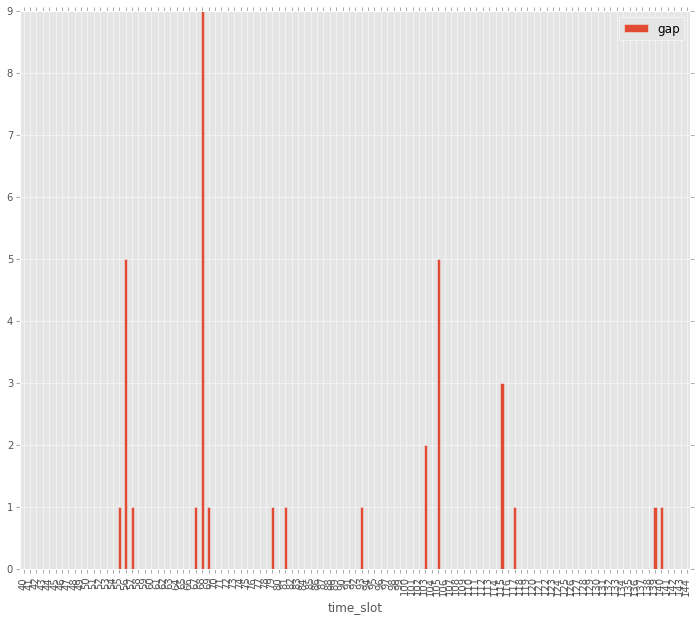

In [959]:
test.plot(kind='bar', figsize=(12,10), xticks=range(40))

In [942]:
np.array([True if k in range(40,145) else False for k in range(1,145)])

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

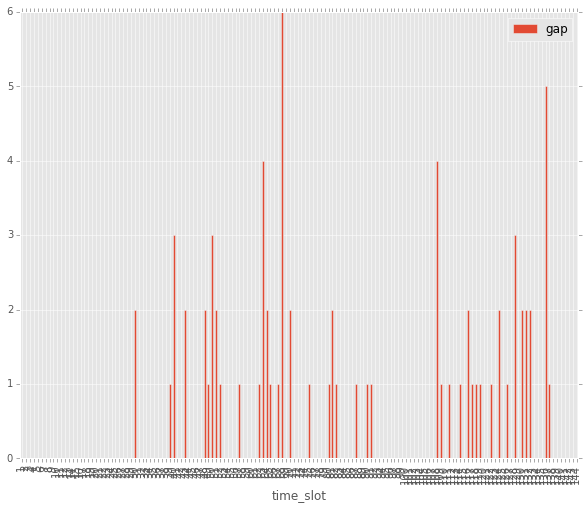

In [935]:
gapDf.loc['3'].plot(kind='bar', figsize=(10, 8))

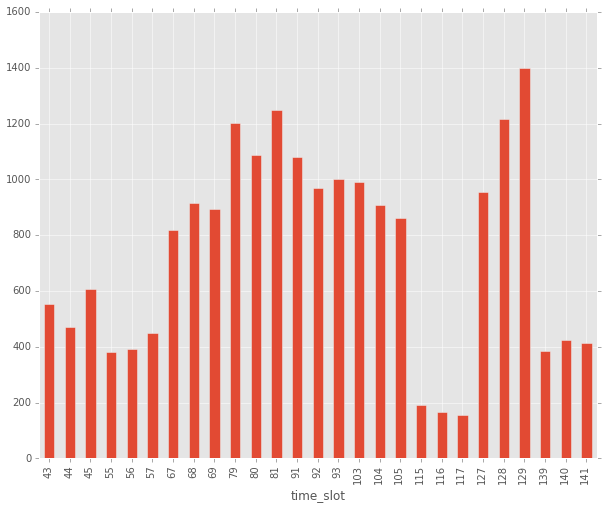

In [917]:
df0130 = explore_gap_by_timeslot('2016-01-30', folder='testing')

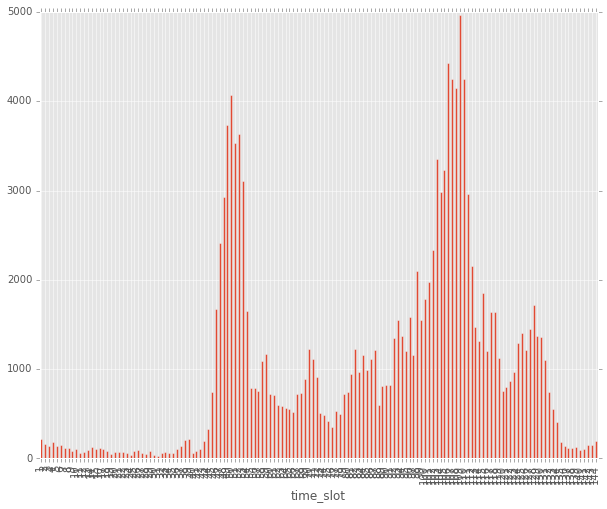

In [918]:
df0122 = explore_gap_by_timeslot('2016-01-20', folder='training')

In [899]:
df0122

,order_id,driver_id,passenger_id,start_district_hash,dest_district_hash,Price,time_slot
Time,,,,,,,
2016-01-20 14:37:30,04b51f31f034dff7d8bd9d3ba967c465,19efb31750c5ebefef261cc23012a5fe,cd21318cec303b38bd7d11b87ff40b51,2407d482f0ffa22a947068f2551fe62c,1afd7afbc81ecc1b13886a569d869e8a,20.3,88
2016-01-20 11:44:13,8bcfeb27abd9376d5dfbed6f266425f2,6621b8b42741fc56297af5e53ebae0c5,2344f6cbf5757c03fd939e19c3f4c37a,2920ece99323b4c111d6f9affc7ea034,4725c39a5e5f4c188d382da3910b3f3f,25.0,71
2016-01-20 17:47:58,8eeb9c75765d3d4d98563cac6ac9d8e7,7ba883ffbc0e918e265ca0a4e1211d05,7c1d56abd1b6c738395b556e7a7a688b,62afaf3288e236b389af9cfdc5206415,929ec6c160e6f52c20a4217c7978f681,30.0,107
2016-01-20 01:03:13,c942e7045b224a6cfcd6cc87ac7c33e8,dd4e41c16a4e6173c2a14dd127e4c761,14a318d186524a4ef85c533f8cca7a88,4725c39a5e5f4c188d382da3910b3f3f,4725c39a5e5f4c188d382da3910b3f3f,11.0,7
2016-01-20 08:17:51,35e72f057b8be15a5d5f805afa25bb2d,62c9ee7341b9a113566d7be7c419db23,65790b81eba94ddb46068418b57b9db8,38d5ad2d22b61109fd8e7b43cd0e8901,4725c39a5e5f4c188d382da3910b3f3f,15.0,50
2016-01-20 09:13:18,67c423a9a23155e7dac3f1369ea7f2ac,ffcc1e02f5b7b36efbbb967bc18e592a,1a1ada9e366ec1ddb739dc84f7948344,82cc4851f9e4faa4e54309f8bb73fd7c,d4ec2125aff74eded207d2d915ef682f,20.0,56
2016-01-20 17:40:53,f717f7223b31af94f15d1a7de9eea926,NaN,c10538c978ebf9fc3b4d141bb08de55d,d4ec2125aff74eded207d2d915ef682f,d4ec2125aff74eded207d2d915ef682f,16.0,107
2016-01-20 02:35:02,19664c105ea6f5c1973d70686045aa4b,be2dfd7787417ec4169d26dd17ba2ead,db2d8918c5374045de7d9a12b29f6081,91690261186ae5bee8f83808ea1e4a01,d4ec2125aff74eded207d2d915ef682f,36.0,16
2016-01-20 17:04:54,60463906f7051c0f8cdf8d38c296d88c,NaN,9facf0279b71228e52497b09ebd462f6,62afaf3288e236b389af9cfdc5206415,74c1c25f4b283fa74a5514307b0d0278,4.0,103


In [880]:
def 

Time
2016-01-22 17:19:43     8.0
2016-01-22 17:19:43    13.0
2016-01-22 11:00:05    19.0
2016-01-22 17:00:42    37.0
2016-01-22 17:00:42    37.0
2016-01-22 21:00:29    13.0
2016-01-22 17:29:25    18.5
2016-01-22 09:14:30    12.8
2016-01-22 09:14:30    11.0
2016-01-22 09:14:30    15.0
2016-01-22 09:14:30    11.0
2016-01-22 23:19:31    15.0
2016-01-22 19:26:25    19.0
2016-01-22 07:22:59    14.0
2016-01-22 21:17:15    19.0
2016-01-22 23:01:06    28.0
2016-01-22 17:11:13    41.1
2016-01-22 17:11:13    41.0
2016-01-22 09:29:33     4.0
2016-01-22 19:25:30     7.0
2016-01-22 19:25:30    12.0
2016-01-22 17:00:55    15.0
2016-01-22 15:25:48    18.0
2016-01-22 15:20:54     4.0
2016-01-22 09:19:40    12.0
2016-01-22 09:19:40    12.0
2016-01-22 09:22:58    30.4
2016-01-22 13:28:37     8.0
2016-01-22 09:13:33     8.0
2016-01-22 17:05:08    12.8
                       ... 
2016-01-22 09:07:01    23.0
2016-01-22 11:16:15     4.0
2016-01-22 17:29:47    30.0
2016-01-22 21:04:39    20.0
2016-01-22 23:2

In [962]:
gapDf

gap
district_id time_slot     
50          1            5
            2            3
            3            3
            4            0
            5            0
            6            0
            7            1
            8            1
            9            0
            10           0
            11           0
            12           1
            13           1
            14           0
            15           0
            16           0
            17           0
            18           0
            19           0
            20           0
            21           0
            22           0
            23           0
            24           0
            25           0
            26           0
            27           0
            28           0
            29           0
            30           1
...                    ...
32          115          2
            116          1
            117          1
            118          0
            119          0
            120          0
            121          0
            122          0
            123          1
            124          0
            125          0
            126          0
            127          1
            128          0
            129          0
            130          0
            131          2
            132          0
            133          1
            134          0
            135          0
            136          0
            137          1
            138          1
            139          0
            140          2
            141          1
            142          1
            143          0
            144          0

[9504 rows x 1 columns]

In [964]:
testDf = gapDf.rolling(window=2).mean()

In [965]:
calculate_mape(gapDf, testDf)

gap    0.408556
dtype: float64

In [ ]:
def filter_timeslot(gapDf):
    '''
    '''
    gapDf.loc
    

In [991]:
gapDf

gap
district_id time_slot     
50          1            5
            2            3
            3            3
            4            0
            5            0
            6            0
            7            1
            8            1
            9            0
            10           0
            11           0
            12           1
            13           1
            14           0
            15           0
            16           0
            17           0
            18           0
            19           0
            20           0
            21           0
            22           0
            23           0
            24           0
            25           0
            26           0
            27           0
            28           0
            29           0
            30           1
...                    ...
32          115          2
            116          1
            117          1
            118          0
            119          0
            120          0
            121          0
            122          0
            123          1
            124          0
            125          0
            126          0
            127          1
            128          0
            129          0
            130          0
            131          2
            132          0
            133          1
            134          0
            135          0
            136          0
            137          1
            138          1
            139          0
            140          2
            141          1
            142          1
            143          0
            144          0

[9504 rows x 1 columns]

In [1041]:
predictDf

gap
district_id time_slot           
50          46          0.228676
            58          0.246371
            70          0.156323
            82          0.085709
            94          0.378608
            106         0.244120
            118         0.592001
            130         0.403159
            142         0.377113
43          46          0.060832
            58          0.297678
            70          1.258031
            82          0.907783
            94          0.479315
            106         0.630821
            118         0.439897
            130         1.569111
            142         0.538814
63          46          0.004417
            58          0.422520
            70          0.488205
            82          0.780036
            94          0.329945
            106         0.099278
            118         0.283913
            130         0.411781
            142         0.346504
46          46          5.632262
            58         90.485680
            70         46.000373
...                          ...
53          118         1.952571
            130         1.193287
            142         0.406318
41          46          0.515621
            58          1.287069
            70          2.559146
            82          1.708445
            94          1.666437
            106         0.801360
            118         0.624109
            130         0.261489
            142         0.560120
27          46          6.296473
            58          8.584293
            70          8.852475
            82          9.701094
            94         12.127711
            106        12.725849
            118         9.717424
            130         8.355598
            142         4.679972
32          46          0.167381
            58          0.503552
            70          0.264816
            82          0.255241
            94          0.524153
            106         0.682645
            118         0.510605
            130         0.271440
            142         0.642600

[594 rows x 1 columns]

In [996]:
predict = gapDf.ewm(span=20).mean()

In [1005]:
predictDf = filterTimeSlot(predict)

In [1007]:
gapDf = filterTimeSlot(gapDf)

In [1027]:
((predictDf - gapDf) / gapDf).applymap(lambda x: math.fabs(x)).replace(np.inf, np.nan).count()

gap    334
dtype: int64

In [988]:
def predict_by_window(window_size=2, *training_dates, **argvs):
    '''predict gap by average previous 3 time_slots
    
    Notes: 
    
    Args:
    
    Return:
    
    '''
    folderGet = argvs['folder']
    date = training_dates[0]
    gapDf = get_gap(date, folder=folderGet)
    gapPredictDf = gapDf.rolling(window=2).mean()
    gapFilterDf = gapPredictDf.loc[np.array([True if item in range(46, 152, 12) else False for item in\
                                             gapPredictDf.index.get_level_values('time_slot')])]

    return gapFilterDf
    

In [40]:
def predict_by_ewma(*training_dates, **argvs):
    '''predict gap by average previous 3 time_slots
    
    Notes: 
    
    Args:
    
    Return:
    
    '''
    folderGet = argvs['folder']
    date = training_dates[0]
    gapDf = transformer.get_gap(date, folder=folderGet)
    gapPredictDf = gapDf.ewm(span=3).mean()
    gapFilterDf = gapPredictDf.loc[np.array([True if item in range(46, 152, 12) else False for item in\
                                             gapPredictDf.index.get_level_values('time_slot')])]
    return gapFilterDf

In [1075]:
predictByWindow = predict_by_previous('2016-01-16', folder='training')

In [1201]:
predictByEwma = predict_by_ewma('2016-01-16', folder='training')

In [1076]:
calculate_mape(filterTimeSlot(get_gap('2016-01-16', folder='training')), predictByWindow)

gap    0.387057
dtype: float64

In [1074]:
calculate_mape(filterTimeSlot(get_gap('2016-01-16', folder='training')), predictByEwma)

gap    0.348931
dtype: float64

In [980]:
def filterTimeSlot(gapDf):
    gapFilterDf = gapDf.loc[np.array([True if item in range(46, 152, 12) else False for item in\
                                             gapDf.index.get_level_values('time_slot')])]
    return gapFilterDf

In [1154]:
gapDf = get_gap('2016-01-05', folder='training')

In [1155]:
gapFilterDf = filterTimeSlot(gapDf)

In [1162]:
csvGet = printout(gapFilterDf, date='2016-01-05')

/Users/hadoop1/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/hadoop1/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [1163]:
print csvGet

50,2016-01-05-46,0
50,2016-01-05-58,3
50,2016-01-05-70,1
50,2016-01-05-82,1
50,2016-01-05-94,0
50,2016-01-05-106,0
50,2016-01-05-118,0
50,2016-01-05-130,0
50,2016-01-05-142,1
43,2016-01-05-46,0
43,2016-01-05-58,0
43,2016-01-05-70,0
43,2016-01-05-82,0
43,2016-01-05-94,2
43,2016-01-05-106,1
43,2016-01-05-118,0
43,2016-01-05-130,0
43,2016-01-05-142,0
63,2016-01-05-46,0
63,2016-01-05-58,1
63,2016-01-05-70,0
63,2016-01-05-82,0
63,2016-01-05-94,0
63,2016-01-05-106,0
63,2016-01-05-118,1
63,2016-01-05-130,0
63,2016-01-05-142,0
46,2016-01-05-46,9
46,2016-01-05-58,77
46,2016-01-05-70,4
46,2016-01-05-82,2
46,2016-01-05-94,4
46,2016-01-05-106,11
46,2016-01-05-118,6
46,2016-01-05-130,2
46,2016-01-05-142,4
56,2016-01-05-46,1
56,2016-01-05-58,4
56,2016-01-05-70,2
56,2016-01-05-82,0
56,2016-01-05-94,0
56,2016-01-05-106,0
56,2016-01-05-118,0
56,2016-01-05-130,1
56,2016-01-05-142,0
6,2016-01-05-46,1
6,2016-01-05-58,36
6,2016-01-05-70,4
6,2016-01-05-82,1
6,2016-01-05-94,0
6,2016-01-05-106,2
6,2016-01-05-

In [27]:
def getCsv(gapDf, date):
    '''get the csv printout variable according to given gapDf
    
    Notes:
        
    
    Argvs:
        gapDf: the gap dataframe
        date: the date info used as a tag
    
    Return:
        csvTemp: a variable used for printing out
    '''
    indexList = gapDf.index.tolist()
    gapDf['district_id'] = [x[0] for x in indexList]
    gapDf['time_slot'] = ['{}-{}'.format(date, x[1]) for x in indexList]
    csvTemp = gapDf[['district_id', 'time_slot', 'gap']].to_csv(index=False, header=False)
    
    return csvTemp

In [28]:
def printCsv(label, predictDict):
    '''
    '''
    fileOut = 'predict_{}'.format(label)
    f = open(fileOut, 'w')
    for item in predictDict.keys():
        
        csvGet = getCsv(gapDf=predictDict[item], date=item)
        f.write(csvGet)
        # test()
    f.close()

In [1198]:
testDict = {'2016-01-05': gapFilterDf}

In [1199]:
printCsv(label='2016-01-05', predictDict=testDict)

/Users/hadoop1/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/hadoop1/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [1202]:
test = predict_ByEwma('2016-01-22', folder='testing')

TypeError: 'DataFrame' object is not callable

In [1203]:
predictByEwma = predict_by_ewma('2016-01-16', folder='training')

In [31]:
def summrize_prediction():
    '''
    '''
    
    datesList = ['2016-01-22', '2016-01-24', '2016-01-26', '2016-01-28', '2016-01-30']
    # step 1. make the prediction and stored into a dictionary
    predictDict = {}
    for date in datesList:
        df = predict_by_ewma(date, folder='testing')
        predictDict[date] = df
    # step 2. generate csv and print out to file
    printCsv('0530', predictDict)

In [74]:
printCsv('0531', gapDict)

In [1205]:
summrize_prediction(estimator=predict_by_ewma)

In [64]:
datesList = ['2016-01-22', '2016-01-24', '2016-01-26', '2016-01-28', '2016-01-30']
predictEwmaDict = {}
for date in datesList:
    predictEwmaDict[date] = predict_by_ewma(date, folder='testing')
    

In [66]:
for date in datesList:
    print predictAverageDict['date']

KeyError: 'date'

In [71]:
gapDict = {}
for date in datesList:
    gapDict[date] = (predictAverageDict[date]*3 + predictEwmaDict[date]*7)/10

In [73]:
gapDict

{'2016-01-22':                                 gap
 district_id time_slot              
 50          46         1.500000e-01
             58         1.500000e-01
             70         3.062500e-01
             82         8.757477e-02
             94         2.187714e-01
             106        5.341098e-05
             118        3.000000e-01
             130        3.183543e-12
             142        1.543750e+00
 43          46         1.554312e-16
             58         2.375000e-01
             70         1.406271e+00
             82         4.314102e-01
             94         4.375321e-01
             106        1.175107e+00
             118        6.752136e-01
             130        7.126282e-01
             142        4.381412e-02
 63          46         1.750000e-01
             58         8.754272e-02
             70         2.137274e-05
             82         1.500000e-01
             94         2.375000e-01
             106        9.187714e-01
             118        

In [47]:
predict0122

gap district_id       time_slot
district_id time_slot                                  
50          46          0.5          50   2016-01-22-46
            58          0.5          50   2016-01-22-58
            70          0.0          50   2016-01-22-70
            82          0.0          50   2016-01-22-82
            94          0.0          50   2016-01-22-94
            106         0.0          50  2016-01-22-106
            118         1.0          50  2016-01-22-118
            130         0.0          50  2016-01-22-130
            142         5.0          50  2016-01-22-142
43          46          0.0          43   2016-01-22-46
            58          0.5          43   2016-01-22-58
            70          2.5          43   2016-01-22-70
            82          1.0          43   2016-01-22-82
            94          0.0          43   2016-01-22-94
            106         1.0          43  2016-01-22-106
            118         0.5          43  2016-01-22-118
            130         1.5          43  2016-01-22-130
            142         0.0          43  2016-01-22-142
63          46          0.0          63   2016-01-22-46
            58          0.0          63   2016-01-22-58
            70          0.0          63   2016-01-22-70
            82          0.5          63   2016-01-22-82
            94          0.5          63   2016-01-22-94
            106         0.0          63  2016-01-22-106
            118         0.0          63  2016-01-22-118
            130         0.0          63  2016-01-22-130
            142         0.0          63  2016-01-22-142
46          46         20.0          46   2016-01-22-46
            58         49.0          46   2016-01-22-58
            70         21.5          46   2016-01-22-70
...                     ...         ...             ...
53          118         3.5          53  2016-01-22-118
            130         0.0          53  2016-01-22-130
            142         0.5          53  2016-01-22-142
41          46          0.5          41   2016-01-22-46
            58          1.0          41   2016-01-22-58
            70          7.0          41   2016-01-22-70
            82          0.5          41   2016-01-22-82
            94          3.0          41   2016-01-22-94
            106         0.5          41  2016-01-22-106
            118         2.5          41  2016-01-22-118
            130         1.0          41  2016-01-22-130
            142         1.0          41  2016-01-22-142
27          46         14.0          27   2016-01-22-46
            58          9.0          27   2016-01-22-58
            70          7.5          27   2016-01-22-70
            82          9.5          27   2016-01-22-82
            94         11.0          27   2016-01-22-94
            106         9.0          27  2016-01-22-106
            118         8.0          27  2016-01-22-118
            130         4.5          27  2016-01-22-130
            142         4.0          27  2016-01-22-142
32          46          0.5          32   2016-01-22-46
            58          0.0          32   2016-01-22-58
            70          0.0          32   2016-01-22-70
            82          0.0          32   2016-01-22-82
            94          1.0          32   2016-01-22-94
            106         0.0          32  2016-01-22-106
            118         1.0          32  2016-01-22-118
            130         0.0          32  2016-01-22-130
            142         0.5          32  2016-01-22-142

[594 rows x 3 columns]

In [46]:
predictDict['2016-01-22']

gap
district_id time_slot              
50          46         0.000000e+00
            58         0.000000e+00
            70         4.375000e-01
            82         1.251068e-01
            94         3.125305e-01
            106        7.630140e-05
            118        1.862827e-08
            130        4.547918e-12
            142        6.250000e-02
43          46         2.220446e-16
            58         1.250000e-01
            70         9.375305e-01
            82         1.877289e-01
            94         6.250458e-01
            106        1.250153e+00
            118        7.503052e-01
            130        3.751832e-01
            142        6.259160e-02
63          46         2.500000e-01
            58         1.250610e-01
            70         3.053248e-05
            82         7.454219e-09
            94         1.250000e-01
            106        1.312531e+00
            118        3.204420e-04
            130        7.823292e-08
            142        1.909983e-11
46          46         6.500000e+00
            58         6.756409e+01
            70         1.257900e+01
...                             ...
53          118        1.188248e+00
            130        5.627901e-01
            142        1.373999e-04
41          46         7.500000e-01
            58         4.375183e+00
            70         2.501068e+00
            82         6.256106e-01
            94         7.501527e-01
            106        2.501831e-01
            118        2.500611e-01
            130        1.875611e-01
            142        3.125458e-01
27          46         4.562500e+00
            58         4.938614e+00
            70         4.376206e+00
            82         6.188568e+00
            94         5.126511e+00
            106        6.938752e+00
            118        2.751694e+00
            130        1.313172e+00
            142        2.500321e+00
32          46         8.882923e-15
            58         2.500000e-01
            70         2.500610e-01
            82         6.105006e-05
            94         1.875000e-01
            106        3.750458e-01
            118        1.250916e-01
            130        1.250305e-01
            142        5.625305e-01

[594 rows x 1 columns]